# Analysing CIA Factbook

### Getting to know the data

In [59]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
q = "SELECT * FROM sqlite_master WHERE type='table'"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [60]:
q_facts = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q_facts, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


## Summary Statistics

In [61]:
q_outliers = 'SELECT MIN(population) "Minimum Population", MAX(population) "Maximum Population",\
MIN(population_growth) "Minimum Population Growth", MAX(population_growth) "Maximum Population Growth" FROM facts '
pd.read_sql_query(q_outliers, conn)

,Minimum Population,Maximum Population,Minimum Population Growth,Maximum Population Growth
0,0,7256490011,0.0,4.02


## Exploring Outliers

In [62]:
q_min_pop = 'SELECT * FROM facts \
WHERE population == (SELECT MIN(population) FROM facts)'

pd.read_sql_query(q_min_pop, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [63]:
q_max_pop = 'SELECT *  FROM facts WHERE population = (SELECT MAX(population) FROM facts)'
pd.read_sql_query(q_max_pop, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


1- The minimum population show the population of the non-inhabited Antarctica. However, antartica is not inhabited in the normal sense, there are settlements of scientists on the land.

2- Most of information is missing regarding Antarctica

3- The Maximum population row is the world statistics. Total Population, average birth, death and population growth rates

## Visualizing excluding the outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4aee62e048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4aee5574a8>]], dtype=object)

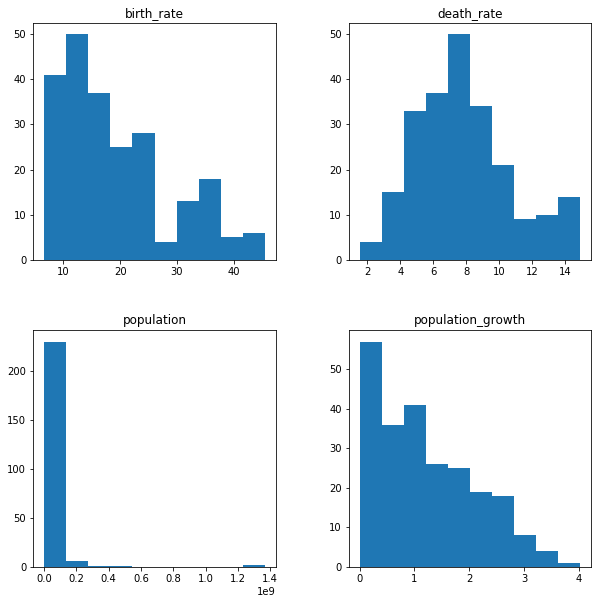

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

q_hist = "SELECT population, population_growth, birth_rate, death_rate FROM facts \
WHERE population != (SELECT MAX(population) FROM facts) & population != (SELECT MIN(population) FROM facts)"

df = pd.read_sql_query(q_hist, conn)
df.hist(figsize=(10,10), grid=False, bins = 10)


## Population Density

In [65]:
q_density = "SELECT name, cast(population as Float)/cast(area_land as Float) density FROM facts \
ORDER BY density DESC"

df = pd.read_sql_query(q_density, conn)
df_den = df.dropna()
print(df_den) 

                                  name       density
0                                Macau  21168.964286
1                               Monaco  15267.500000
2                            Singapore   8259.784571
3                            Hong Kong   6655.271202
4                           Gaza Strip   5191.819444
5                            Gibraltar   4876.333333
6                              Bahrain   1771.859211
7                             Maldives   1319.640940
8                                Malta   1310.015823
9                              Bermuda   1299.925926
10                          Bangladesh   1297.977606
11                        Sint Maarten   1167.323529
12                            Guernsey    847.179487
13                              Jersey    838.741379
14                              Taiwan    725.825356
15                            Barbados    675.823256
16                           Mauritius    660.013300
17                               Aruba    623.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4aee4ef1d0>]], dtype=object)

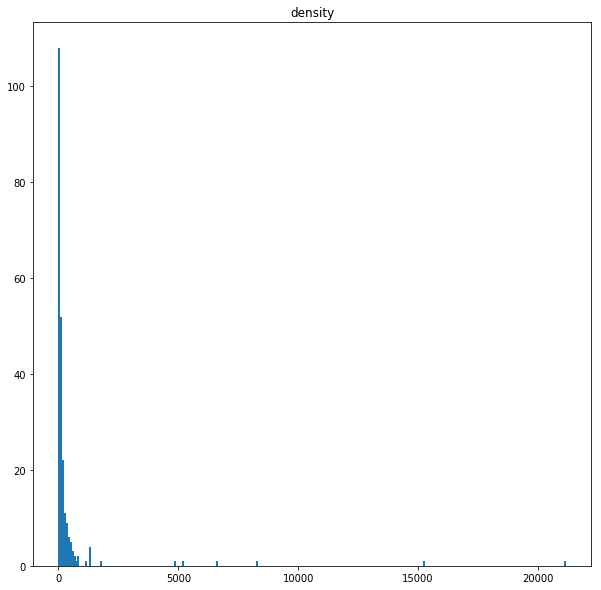

In [66]:
df_den.hist(figsize=(10,10),grid= False, bins=267)

## Ratios of water to land

In [67]:
q_water_land = "select name, cast(area_water as Float)/cast(area_land as float) water_to_land_ratio from facts \
order by water_to_land_ratio desc"

pd.read_sql_query(q_water_land, conn).dropna()

,name,water_to_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


## Ratio of water to total area

In [68]:
q_water = "select name, cast(area_water as Float)/cast(area as float) water_ratio from facts \
order by water_ratio desc"

pd.read_sql_query(q_water, conn).dropna()

,name,water_ratio
0,British Indian Ocean Territory,0.998897
1,Virgin Islands,0.818848
2,Puerto Rico,0.356827
3,"Bahamas, The",0.278818
4,Guinea-Bissau,0.221592
5,Malawi,0.205969
6,Netherlands,0.184147
7,Uganda,0.182287
8,Eritrea,0.141156
9,Liberia,0.135127


In [69]:
conn.close()